# FIFA DATASET

# Índice
1. [Goleadores](#Goleadores)
2. [Partidos](#Partidos)
3. [Resultados](#Resultados)

Descripcion

In [840]:
import pandas as pd
import numpy as np

In [841]:
ruta_goleadores = 'data/goalscorers.csv'
ruta_partidos = 'data/results.csv'
ruta_resultados = 'data/shootouts.csv'

## Goleadores

In [842]:
df_goleadores = pd.read_csv(ruta_goleadores,low_memory = False)
df_goleadores.head(5)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [843]:
print(len(df_goleadores))

41008


In [844]:
df_goleadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41008 non-null  object 
 1   home_team  41008 non-null  object 
 2   away_team  41008 non-null  object 
 3   team       41008 non-null  object 
 4   scorer     40959 non-null  object 
 5   minute     40750 non-null  float64
 6   own_goal   41008 non-null  bool   
 7   penalty    41008 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB


In [845]:
df_goleadores_filtrado= df_goleadores.copy()
df_goleadores_filtrado[['date' ]]=df_goleadores_filtrado[['date']].apply(pd.to_datetime)
df_goleadores_filtrado

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


### Calidad de los datos

In [846]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Valores Faltantes', 1: '% de Valores Totales'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
    print("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
                                                     "Hay " + str(mis_val_table_ren_columns.shape[0]) +
          " columnas que les faltan valores.")
    return mis_val_table_ren_columns

In [847]:
df_goleadores_filtrado.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [848]:
missing_values_table(df_goleadores_filtrado)

El dataframe tiene 8 columnas.
Hay 2 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
minute,258,0.6
scorer,49,0.1


In [849]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_goleadores_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
# Drop the columns
df_goleadores_filtrado = df_goleadores_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 8 columnas.
Hay 2 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [850]:
df_goleadores_filtrado = df_goleadores_filtrado[df_goleadores_filtrado['date'].dt.year >= 2015]
df_goleadores_filtrado.reset_index(drop=True,inplace=True)
df_goleadores_filtrado

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,2015-01-09,Australia,Kuwait,Kuwait,Hussain Fadhel,8.0,False,False
1,2015-01-09,Australia,Kuwait,Australia,Tim Cahill,33.0,False,False
2,2015-01-09,Australia,Kuwait,Australia,Massimo Luongo,45.0,False,False
3,2015-01-09,Australia,Kuwait,Australia,Mile Jedinak,62.0,False,True
4,2015-01-09,Australia,Kuwait,Australia,James Troisi,90.0,False,False
...,...,...,...,...,...,...,...,...
7865,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
7866,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
7867,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
7868,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


## Partidos

In [851]:
df_partidos = pd.read_csv(ruta_partidos,low_memory = False)
df_partidos.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [852]:
print(len(df_partidos))

44557


In [853]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44557 non-null  object
 1   home_team   44557 non-null  object
 2   away_team   44557 non-null  object
 3   home_score  44557 non-null  int64 
 4   away_score  44557 non-null  int64 
 5   tournament  44557 non-null  object
 6   city        44557 non-null  object
 7   country     44557 non-null  object
 8   neutral     44557 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [854]:
df_partidos_filtrado= df_partidos.copy()
df_partidos_filtrado[['date' ]]=df_partidos_filtrado[['date']].apply(pd.to_datetime)
df_partidos_filtrado

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [855]:
print(f'En el dataset de International Football data hay: {len(df_partidos_filtrado)} partidos.')
print(f'Desde el {df_partidos_filtrado["date"].min().date()} hasta el {df_partidos_filtrado["date"].max().date()}.')
print(f'Desde el {df_partidos_filtrado["date"].min().date()} hasta el {df_partidos_filtrado["date"].max().date()}.')

print(f'Un total de {len(pd.unique(df_partidos_filtrado["tournament"]))}  torneos.')

En el dataset de International Football data hay: 44557 partidos.
Desde el 1872-11-30 hasta el 2023-03-29.
Desde el 1872-11-30 hasta el 2023-03-29.
Un total de 142  torneos.


In [856]:
df_partidos_filtrado['tournament'].value_counts()

Friendly                                17593
FIFA World Cup qualification             7878
UEFA Euro qualification                  2631
African Cup of Nations qualification     1976
FIFA World Cup                            964
                                        ...  
Évence Coppée Trophy                        1
Copa Confraternidad                         1
Real Madrid 75th Anniversary Cup            1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 142, dtype: int64

In [857]:
torneos_a_conservar = ['FIFA World Cup qualification', 'FIFA World Cup', 'Copa América', 'UEFA Euro', 'Confederations Cup', 'African Cup of Nations',  'CONCACAF Championship', 'AFC Asian Cup']
df_partidos_filtrado = df_partidos_filtrado[df_partidos_filtrado['tournament'].isin(torneos_a_conservar)]
df_partidos_filtrado

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
438,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True
440,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True
...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


In [858]:
# Cuenta las apariciones como equipo local
apariciones_local = df_partidos_filtrado['home_team'].value_counts()

# Cuenta las apariciones como equipo visitante
apariciones_visitante = df_partidos_filtrado['away_team'].value_counts()

# Suma los conteos
apariciones_totales = apariciones_local.add(apariciones_visitante, fill_value=0)

# Convierte a DataFrame y resetea el índice
apariciones_totales = apariciones_totales.reset_index()
apariciones_totales.columns = ['Equipo', 'Apariciones']

apariciones_totales = apariciones_totales.sort_values('Apariciones', ascending=False)

print(apariciones_totales)

                    Equipo  Apariciones
27                  Brazil          465
8                Argentina          453
205                Uruguay          447
40                   Chile          391
148               Paraguay          378
..                     ...          ...
186  São Tomé and Príncipe           10
210       Vietnam Republic            9
159               Saarland            4
178            South Sudan            4
213              Yemen DPR            4

[217 rows x 2 columns]


### Calidad de los datos

In [859]:
df_partidos_filtrado.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [860]:
missing_values_table(df_partidos_filtrado)

El dataframe tiene 9 columnas.
Hay 0 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales


In [861]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_partidos_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
# Drop the columns
df_partidos_filtrado = df_partidos_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 9 columnas.
Hay 0 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [862]:
df_partidos_filtrado = df_partidos_filtrado[df_partidos_filtrado['date'].dt.year >= 2015]
df_partidos_filtrado.reset_index(drop=True,inplace=True)
df_partidos_filtrado

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False
1,2015-01-10,South Korea,Oman,1,0,AFC Asian Cup,Canberra,Australia,True
2,2015-01-10,Saudi Arabia,China PR,0,1,AFC Asian Cup,Brisbane,Australia,True
3,2015-01-10,Uzbekistan,North Korea,1,0,AFC Asian Cup,Sydney,Australia,True
4,2015-01-11,Iran,Bahrain,2,0,AFC Asian Cup,Melbourne,Australia,True
...,...,...,...,...,...,...,...,...,...
2321,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
2322,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
2323,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
2324,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


## Resultados

In [863]:
df_resultados = pd.read_csv(ruta_resultados,low_memory = False)
df_resultados.head(5)

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [864]:
print(len(df_resultados))

547


In [865]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       547 non-null    object
 1   home_team  547 non-null    object
 2   away_team  547 non-null    object
 3   winner     547 non-null    object
dtypes: object(4)
memory usage: 17.2+ KB


In [866]:
df_resultados_filtrado= df_resultados.copy()
df_resultados_filtrado[['date' ]]=df_resultados_filtrado[['date']].apply(pd.to_datetime)
df_resultados_filtrado

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
542,2022-12-05,Japan,Croatia,Croatia
543,2022-12-06,Morocco,Spain,Morocco
544,2022-12-09,Croatia,Brazil,Croatia
545,2022-12-09,Netherlands,Argentina,Argentina


### Calidad de los datos

In [867]:
df_resultados_filtrado.isnull().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

In [868]:
missing_values_table(df_resultados_filtrado)

El dataframe tiene 4 columnas.
Hay 0 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales


In [869]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_resultados_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
# Drop the columns
df_resultados_filtrado = df_resultados_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 4 columnas.
Hay 0 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [870]:
df_resultados_filtrado = df_resultados_filtrado[df_resultados_filtrado['date'].dt.year >= 2015]
df_resultados_filtrado.reset_index(drop=True,inplace=True)
df_resultados_filtrado

,date,home_team,away_team,winner
0,2015-01-23,Iran,Iraq,Iraq
1,2015-01-23,Japan,United Arab Emirates,United Arab Emirates
2,2015-01-30,Curaçao,Aruba,Aruba
3,2015-02-07,Equatorial Guinea,DR Congo,DR Congo
4,2015-02-08,Ivory Coast,Ghana,Ivory Coast
...,...,...,...,...
132,2022-12-05,Japan,Croatia,Croatia
133,2022-12-06,Morocco,Spain,Morocco
134,2022-12-09,Croatia,Brazil,Croatia
135,2022-12-09,Netherlands,Argentina,Argentina


### INTEGRACION

In [871]:
print(len(df_resultados_filtrado))
print(len(df_goleadores_filtrado))
print(len(df_partidos_filtrado))

137
7870
2326


In [872]:
df_resultados_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       137 non-null    datetime64[ns]
 1   home_team  137 non-null    object        
 2   away_team  137 non-null    object        
 3   winner     137 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.4+ KB


In [873]:
df_goleadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7870 non-null   datetime64[ns]
 1   home_team  7870 non-null   object        
 2   away_team  7870 non-null   object        
 3   team       7870 non-null   object        
 4   scorer     7870 non-null   object        
 5   minute     7870 non-null   float64       
 6   own_goal   7870 non-null   bool          
 7   penalty    7870 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(4)
memory usage: 384.4+ KB


In [874]:
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2326 non-null   datetime64[ns]
 1   home_team   2326 non-null   object        
 2   away_team   2326 non-null   object        
 3   home_score  2326 non-null   int64         
 4   away_score  2326 non-null   int64         
 5   tournament  2326 non-null   object        
 6   city        2326 non-null   object        
 7   country     2326 non-null   object        
 8   neutral     2326 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 147.8+ KB


In [875]:
print(len(df_resultados_filtrado))

137


In [876]:
# Unir df_resultados y df_partidos
conditions = [
    df_partidos_filtrado['home_score'] > df_partidos_filtrado['away_score'],
    df_partidos_filtrado['home_score'] < df_partidos_filtrado['away_score']
]

choices = [
    df_partidos_filtrado['home_team'],
    df_partidos_filtrado['away_team']
]

df_partidos_filtrado['winner'] = np.select(conditions, choices, default='Draw')
df_partidos_filtrado

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia
1,2015-01-10,South Korea,Oman,1,0,AFC Asian Cup,Canberra,Australia,True,South Korea
2,2015-01-10,Saudi Arabia,China PR,0,1,AFC Asian Cup,Brisbane,Australia,True,China PR
3,2015-01-10,Uzbekistan,North Korea,1,0,AFC Asian Cup,Sydney,Australia,True,Uzbekistan
4,2015-01-11,Iran,Bahrain,2,0,AFC Asian Cup,Melbourne,Australia,True,Iran
...,...,...,...,...,...,...,...,...,...,...
2321,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France
2322,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina
2323,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France
2324,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia


In [877]:
print(len(df_partidos_filtrado))

2326


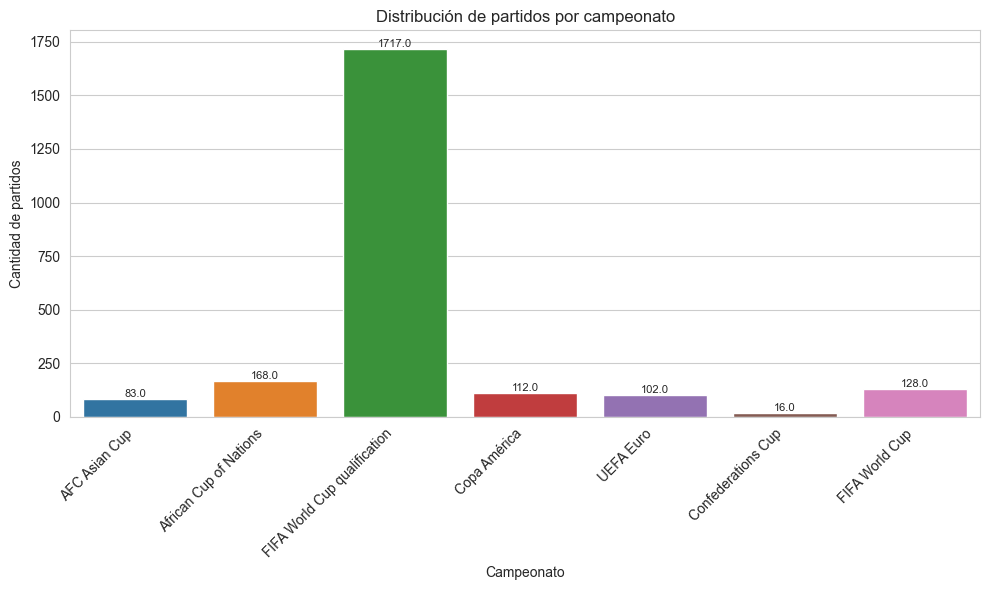

In [878]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="tournament", data=df_partidos_filtrado)

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Añadir etiquetas al eje y
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)

# Añadir título y etiquetas a los ejes
plt.title("Distribución de partidos por campeonato")
plt.xlabel("Campeonato")
plt.ylabel("Cantidad de partidos")

plt.tight_layout()
plt.savefig("resources/grafico_partidos_por_campeonato.png")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

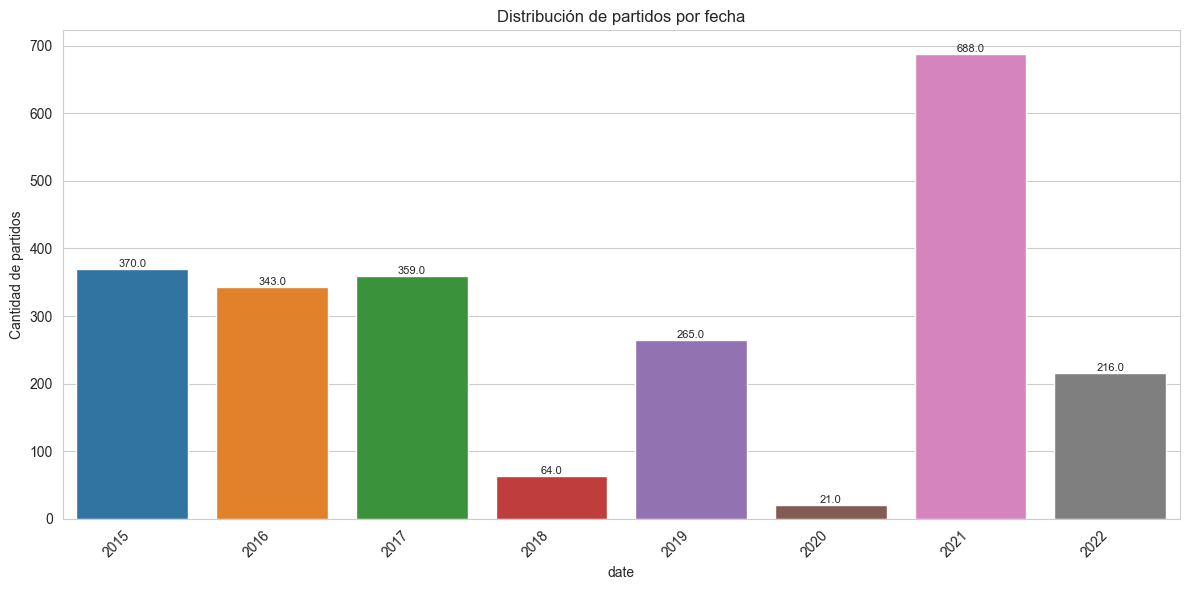

In [879]:
# Configurar estilo de Seaborn
sns.set_style("whitegrid")

# Convertir la columna 'date' a datetime si no está en ese formato
df_partidos_filtrado['date'] = pd.to_datetime(df_partidos_filtrado['date'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df_partidos_filtrado['date'].dt.year, data=df_partidos_filtrado)

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Añadir etiquetas al eje y
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)

# Añadir título y etiquetas a los ejes
plt.title("Distribución de partidos por fecha")
plt.ylabel("Cantidad de partidos")

# Guardar el gráfico como un archivo PNG
plt.savefig("resources/grafico_partidos_por_fecha.png")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [880]:
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2326 non-null   datetime64[ns]
 1   home_team   2326 non-null   object        
 2   away_team   2326 non-null   object        
 3   home_score  2326 non-null   int64         
 4   away_score  2326 non-null   int64         
 5   tournament  2326 non-null   object        
 6   city        2326 non-null   object        
 7   country     2326 non-null   object        
 8   neutral     2326 non-null   bool          
 9   winner      2326 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 165.9+ KB


In [881]:
df_goleadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7870 non-null   datetime64[ns]
 1   home_team  7870 non-null   object        
 2   away_team  7870 non-null   object        
 3   team       7870 non-null   object        
 4   scorer     7870 non-null   object        
 5   minute     7870 non-null   float64       
 6   own_goal   7870 non-null   bool          
 7   penalty    7870 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(4)
memory usage: 384.4+ KB


In [882]:
len(df_goleadores_filtrado)

7870

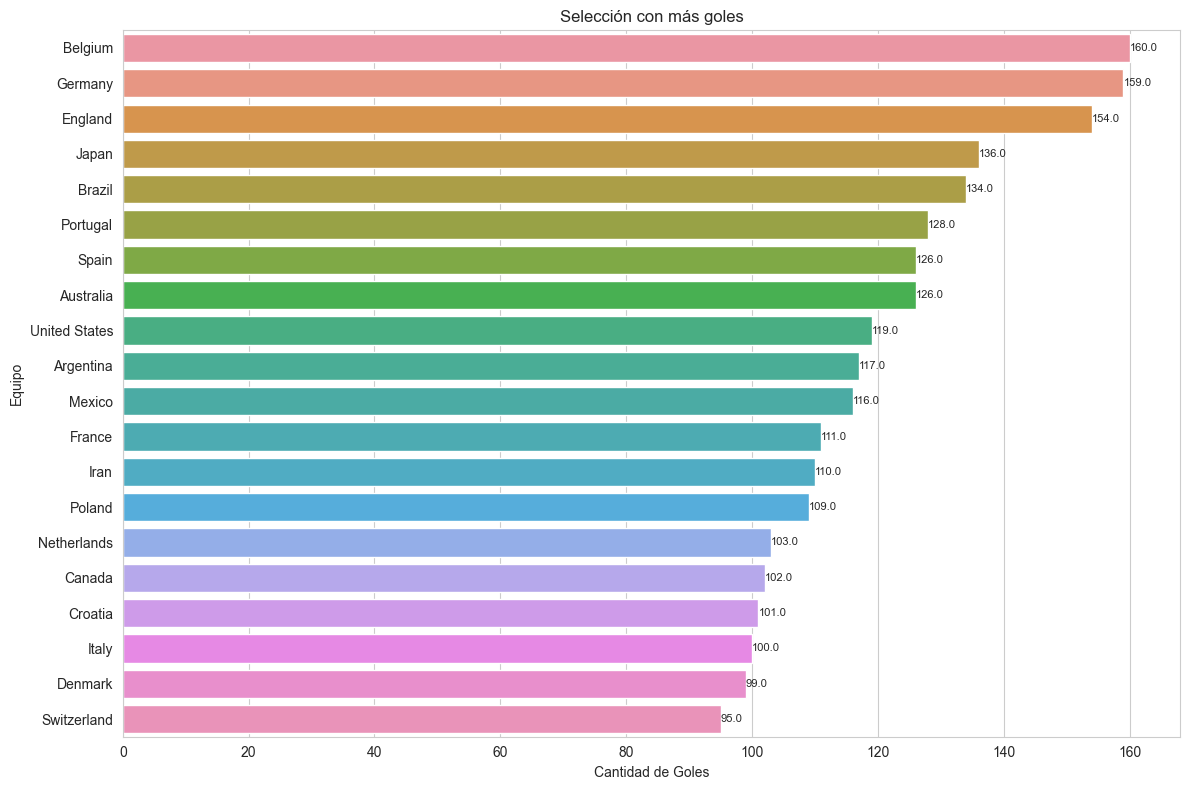

In [883]:
# Obtener la cuenta de goles por equipo
goles_por_equipo = df_goleadores_filtrado['team'].value_counts().reset_index()
goles_por_equipo.columns = ['Equipo', 'Cantidad de Goles']

# Ordenar los equipos por la cantidad de goles
goles_por_equipo = goles_por_equipo.sort_values('Cantidad de Goles', ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Cantidad de Goles', y='Equipo', data=goles_por_equipo)

# Añadir etiquetas al eje x
for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8)

# Añadir título y etiquetas a los ejes
plt.title("Selección con más goles")
plt.xlabel("Cantidad de Goles")

# Guardar el gráfico como PNG en la carpeta "resources"
plt.tight_layout()
plt.savefig("resources/grafico_goles_por_equipo.png")

# Mostrar el gráfico
plt.show()

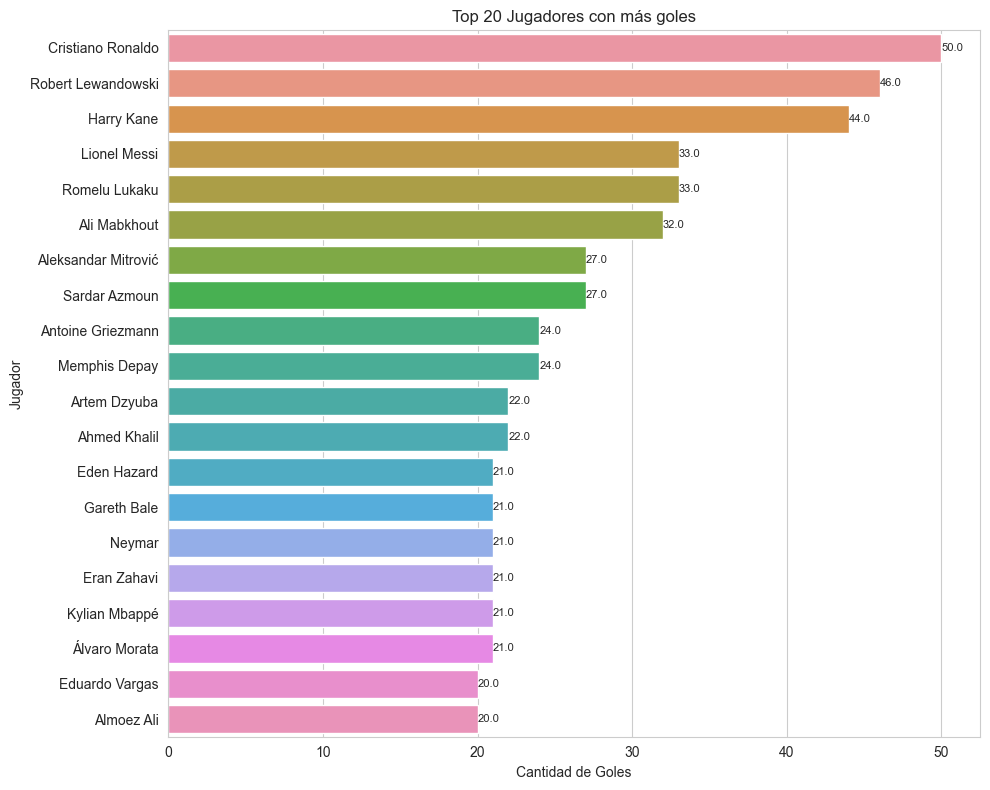

In [884]:
# Obtener la cuenta de goles por jugador
goles_por_jugador = df_goleadores_filtrado['scorer'].value_counts().reset_index()
goles_por_jugador.columns = ['Jugador', 'Cantidad de Goles']

# Ordenar los jugadores por la cantidad de goles
goles_por_jugador = goles_por_jugador.sort_values('Cantidad de Goles', ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Cantidad de Goles', y='Jugador', data=goles_por_jugador)

# Añadir etiquetas al eje x
for p in ax.patches:
    ax.annotate(f"{p.get_width()}", (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8)

# Añadir título y etiquetas a los ejes
plt.title("Top 20 Jugadores con más goles")
plt.xlabel("Cantidad de Goles")
plt.ylabel("Jugador")

# Guardar el gráfico como PNG en la carpeta "resources"
plt.tight_layout()
plt.savefig("resources/grafico_top_20_jugadores_con_mas_goles.png")

# Mostrar el gráfico
plt.show()

In [885]:
df_final = pd.merge(df_partidos_filtrado, df_goleadores_filtrado[['date', 'home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']], on=['date', 'home_team', 'away_team'], how='left')

In [886]:
df_final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,team,scorer,minute,own_goal,penalty
0,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Kuwait,Hussain Fadhel,8.0,False,False
1,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Tim Cahill,33.0,False,False
2,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Massimo Luongo,45.0,False,False
3,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Mile Jedinak,62.0,False,True
4,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,James Troisi,90.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,Argentina,Ángel Di María,36.0,False,False
6459,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,France,Kylian Mbappé,80.0,False,True
6460,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,France,Kylian Mbappé,81.0,False,False
6461,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,Argentina,Lionel Messi,109.0,False,False


In [887]:
missing_values_table(df_final)

El dataframe tiene 15 columnas.
Hay 5 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
team,202,3.1
scorer,202,3.1
minute,202,3.1
own_goal,202,3.1
penalty,202,3.1


In [888]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6462
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6463 non-null   datetime64[ns]
 1   home_team   6463 non-null   object        
 2   away_team   6463 non-null   object        
 3   home_score  6463 non-null   int64         
 4   away_score  6463 non-null   int64         
 5   tournament  6463 non-null   object        
 6   city        6463 non-null   object        
 7   country     6463 non-null   object        
 8   neutral     6463 non-null   bool          
 9   winner      6463 non-null   object        
 10  team        6261 non-null   object        
 11  scorer      6261 non-null   object        
 12  minute      6261 non-null   float64       
 13  own_goal    6261 non-null   object        
 14  penalty     6261 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(10)
memory u

In [889]:
df_final.rename(columns={'date': 'fecha', 'home_team': 'equipo_local', 'away_team': 'equipo_visitante', 'home_score': 'resultado_local', 'away_score': 'resultado_visitante', 'tournament': 'torneo', 'city': 'ciudad', 'country': 'país', 'neutral': 'neutral', 'winner': 'ganador'}, inplace=True)

In [890]:
df_final.reset_index(drop=True,inplace=True)
df_final

,fecha,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ciudad,país,neutral,ganador,team,scorer,minute,own_goal,penalty
0,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Kuwait,Hussain Fadhel,8.0,False,False
1,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Tim Cahill,33.0,False,False
2,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Massimo Luongo,45.0,False,False
3,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,Mile Jedinak,62.0,False,True
4,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,Australia,Australia,James Troisi,90.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,Argentina,Ángel Di María,36.0,False,False
6459,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,France,Kylian Mbappé,80.0,False,True
6460,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,France,Kylian Mbappé,81.0,False,False
6461,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Draw,Argentina,Lionel Messi,109.0,False,False


In [891]:
unique_combinations = df_final[['fecha', 'equipo_local', 'equipo_visitante']].drop_duplicates().shape[0]
print(unique_combinations)

2326


In [892]:
# Número de filas donde la columna 'Scorer' está vacía
num_vacias = df_final['scorer'].isna().sum()

# Número de filas donde la columna 'Scorer' no está vacía
num_no_vacias = df_final['scorer'].notna().sum()

print("Número de filas donde 'Scorer' está vacía: ", num_vacias)
print("Número de filas donde 'Scorer' no está vacía: ", num_no_vacias)

Número de filas donde 'Scorer' está vacía:  202
Número de filas donde 'Scorer' no está vacía:  6261


In [893]:
import pandas as pd

# Combina la información de fecha y equipos para identificar el partido
df_final['partido'] = df_final['fecha'].astype(str) + '_' + df_final['equipo_local'] + '_' + df_final['equipo_visitante']

# Ordena el DataFrame por 'scorer', 'partido' y 'minute' para tener los duplicados juntos
df_final = df_final.sort_values(by=['scorer', 'partido', 'minute'])

# Calcula el valor medio de 'minute'
df_final['minute_mean'] = df_final.groupby(['scorer', 'partido'])['minute'].transform('mean')

# Convierte la columna 'penalty' a tipo booleano si hay algún valor True en el grupo
df_final['penalty'] = df_final.groupby(['scorer', 'partido'])['penalty'].transform(lambda x: x.any())

# Calcula la cantidad de goles anotados por cada 'scorer' en un partido
df_final['goles_anotados'] = df_final.groupby(['scorer', 'partido']).cumcount() + 1

# Elimina las repeticiones y mantén solo la última aparición de cada 'scorer' en un partido
df_final = df_final.drop_duplicates(subset=['scorer', 'partido'], keep='last')

# Elimina las columnas 'minute' originales
df_final = df_final.drop(['minute'], axis=1)

# Renombra la columna 'minute_mean' a 'minute'
df_final = df_final.rename(columns={'minute_mean': 'minute'})

# Restablece el índice del DataFrame
df_final = df_final.reset_index(drop=True)

# Muestra el DataFrame resultante
df_final

,fecha,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ciudad,país,neutral,ganador,team,scorer,own_goal,penalty,partido,minute,goles_anotados
0,2022-01-10,Comoros,Gabon,0,1,African Cup of Nations,Yaoundé,Cameroon,True,Gabon,Gabon,Aaron Boupendza,False,False,2022-01-10_Comoros_Gabon,16.0,1.0
1,2015-09-03,Australia,Bangladesh,5,0,FIFA World Cup qualification,Perth,Australia,False,Australia,Australia,Aaron Mooy,False,False,2015-09-03_Australia_Bangladesh,61.0,1.0
2,2016-03-29,Australia,Jordan,5,1,FIFA World Cup qualification,Sydney,Australia,False,Australia,Australia,Aaron Mooy,False,False,2016-03-29_Australia_Jordan,39.0,1.0
3,2019-09-10,Kuwait,Australia,0,3,FIFA World Cup qualification,Kuwait City,Kuwait,False,Australia,Australia,Aaron Mooy,False,False,2019-09-10_Kuwait_Australia,38.0,1.0
4,2022-02-01,Oman,Australia,2,2,FIFA World Cup qualification,Muscat,Oman,False,Draw,Australia,Aaron Mooy,False,False,2022-02-01_Oman_Australia,79.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2022-11-23,Morocco,Croatia,0,0,FIFA World Cup,Al Khor,Qatar,True,Draw,NaN,NaN,NaN,NaN,2022-11-23_Morocco_Croatia,NaN,NaN
5660,2022-11-24,Uruguay,South Korea,0,0,FIFA World Cup,Al Rayyan,Qatar,True,Draw,NaN,NaN,NaN,NaN,2022-11-24_Uruguay_South Korea,NaN,NaN
5661,2022-11-25,England,United States,0,0,FIFA World Cup,Al Khor,Qatar,True,Draw,NaN,NaN,NaN,NaN,2022-11-25_England_United States,NaN,NaN
5662,2022-12-01,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,Qatar,True,Draw,NaN,NaN,NaN,NaN,2022-12-01_Croatia_Belgium,NaN,NaN


In [894]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                5664 non-null   datetime64[ns]
 1   equipo_local         5664 non-null   object        
 2   equipo_visitante     5664 non-null   object        
 3   resultado_local      5664 non-null   int64         
 4   resultado_visitante  5664 non-null   int64         
 5   torneo               5664 non-null   object        
 6   ciudad               5664 non-null   object        
 7   país                 5664 non-null   object        
 8   neutral              5664 non-null   bool          
 9   ganador              5664 non-null   object        
 10  team                 5462 non-null   object        
 11  scorer               5462 non-null   object        
 12  own_goal             5462 non-null   object        
 13  penalty              5462 non-nul

In [895]:
df_encoded=df_final.copy()
eliminar = ['fecha', 'ciudad', 'país', 'neutral']
df_encoded = df_encoded.drop(columns=eliminar)
df_encoded

,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ganador,team,scorer,own_goal,penalty,partido,minute,goles_anotados
0,Comoros,Gabon,0,1,African Cup of Nations,Gabon,Gabon,Aaron Boupendza,False,False,2022-01-10_Comoros_Gabon,16.0,1.0
1,Australia,Bangladesh,5,0,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,False,2015-09-03_Australia_Bangladesh,61.0,1.0
2,Australia,Jordan,5,1,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,False,2016-03-29_Australia_Jordan,39.0,1.0
3,Kuwait,Australia,0,3,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,False,2019-09-10_Kuwait_Australia,38.0,1.0
4,Oman,Australia,2,2,FIFA World Cup qualification,Draw,Australia,Aaron Mooy,False,False,2022-02-01_Oman_Australia,79.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,Morocco,Croatia,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,NaN,2022-11-23_Morocco_Croatia,NaN,NaN
5660,Uruguay,South Korea,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,NaN,2022-11-24_Uruguay_South Korea,NaN,NaN
5661,England,United States,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,NaN,2022-11-25_England_United States,NaN,NaN
5662,Croatia,Belgium,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,NaN,2022-12-01_Croatia_Belgium,NaN,NaN


In [896]:
# Eliminar las filas donde own_goal sea verdadero
df_encoded = df_encoded[df_encoded['own_goal'] != True]

# Eliminar la columna own_goal
df_encoded = df_encoded.drop('own_goal', axis=1)
df_encoded

,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ganador,team,scorer,penalty,partido,minute,goles_anotados
0,Comoros,Gabon,0,1,African Cup of Nations,Gabon,Gabon,Aaron Boupendza,False,2022-01-10_Comoros_Gabon,16.0,1.0
1,Australia,Bangladesh,5,0,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2015-09-03_Australia_Bangladesh,61.0,1.0
2,Australia,Jordan,5,1,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2016-03-29_Australia_Jordan,39.0,1.0
3,Kuwait,Australia,0,3,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2019-09-10_Kuwait_Australia,38.0,1.0
4,Oman,Australia,2,2,FIFA World Cup qualification,Draw,Australia,Aaron Mooy,False,2022-02-01_Oman_Australia,79.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5659,Morocco,Croatia,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,2022-11-23_Morocco_Croatia,NaN,NaN
5660,Uruguay,South Korea,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,2022-11-24_Uruguay_South Korea,NaN,NaN
5661,England,United States,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,2022-11-25_England_United States,NaN,NaN
5662,Croatia,Belgium,0,0,FIFA World Cup,Draw,NaN,NaN,NaN,2022-12-01_Croatia_Belgium,NaN,NaN


In [897]:
# Verificando datos faltantes
print("Datos faltantes:")
print(df_encoded.isnull().sum())

# Verificando duplicados
print("Duplicados:")
print(df_encoded.duplicated().sum())

Datos faltantes:
equipo_local             0
equipo_visitante         0
resultado_local          0
resultado_visitante      0
torneo                   0
ganador                  0
team                   202
scorer                 202
penalty                202
partido                  0
minute                 202
goles_anotados         202
dtype: int64
Duplicados:
0


In [898]:
missing_data = df_encoded['team'].isnull() & df_encoded['scorer'].isnull()
missing_rows = df_encoded[missing_data]

print("Número de filas donde 'team', 'scorer' faltan datos: ", len(missing_rows))

Número de filas donde 'team', 'scorer' faltan datos:  202


In [899]:
df_encoded = df_encoded.dropna(subset=['team', 'scorer']).copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 5461
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   equipo_local         5295 non-null   object 
 1   equipo_visitante     5295 non-null   object 
 2   resultado_local      5295 non-null   int64  
 3   resultado_visitante  5295 non-null   int64  
 4   torneo               5295 non-null   object 
 5   ganador              5295 non-null   object 
 6   team                 5295 non-null   object 
 7   scorer               5295 non-null   object 
 8   penalty              5295 non-null   object 
 9   partido              5295 non-null   object 
 10  minute               5295 non-null   float64
 11  goles_anotados       5295 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 537.8+ KB


In [900]:
df_encoded.torneo.value_counts()

FIFA World Cup qualification    4027
African Cup of Nations           304
FIFA World Cup                   291
Copa América                     233
UEFA Euro                        215
AFC Asian Cup                    186
Confederations Cup                39
Name: torneo, dtype: int64

In [901]:
# Definir el diccionario de codificación ordinal
codificacion = {
    'FIFA World Cup qualification': 1,
    'African Cup of Nations': 2,
    'FIFA World Cup': 3,
    'Copa América': 4,
    'UEFA Euro': 5,
    'AFC Asian Cup': 6,
    'Confederations Cup': 7,
}

# Aplicar la codificación
df_encoded['torneo_encoded'] = df_encoded['torneo'].replace(codificacion)
df_encoded

,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ganador,team,scorer,penalty,partido,minute,goles_anotados,torneo_encoded
0,Comoros,Gabon,0,1,African Cup of Nations,Gabon,Gabon,Aaron Boupendza,False,2022-01-10_Comoros_Gabon,16.0,1.0,2
1,Australia,Bangladesh,5,0,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2015-09-03_Australia_Bangladesh,61.0,1.0,1
2,Australia,Jordan,5,1,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2016-03-29_Australia_Jordan,39.0,1.0,1
3,Kuwait,Australia,0,3,FIFA World Cup qualification,Australia,Australia,Aaron Mooy,False,2019-09-10_Kuwait_Australia,38.0,1.0,1
4,Oman,Australia,2,2,FIFA World Cup qualification,Draw,Australia,Aaron Mooy,False,2022-02-01_Oman_Australia,79.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,Switzerland,Turkey,3,1,UEFA Euro,Switzerland,Turkey,İrfan Kahveci,False,2021-06-20_Switzerland_Turkey,62.0,1.0,5
5458,Montenegro,Poland,1,2,FIFA World Cup qualification,Poland,Poland,Łukasz Piszczek,False,2017-03-26_Montenegro_Poland,82.0,1.0,1
5459,Montenegro,Kazakhstan,5,0,FIFA World Cup qualification,Montenegro,Montenegro,Žarko Tomašević,False,2016-10-08_Montenegro_Kazakhstan,24.0,1.0,1
5460,Poland,Montenegro,4,2,FIFA World Cup qualification,Poland,Montenegro,Žarko Tomašević,False,2017-10-08_Poland_Montenegro,83.0,1.0,1


In [902]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 5461
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   equipo_local         5295 non-null   object 
 1   equipo_visitante     5295 non-null   object 
 2   resultado_local      5295 non-null   int64  
 3   resultado_visitante  5295 non-null   int64  
 4   torneo               5295 non-null   object 
 5   ganador              5295 non-null   object 
 6   team                 5295 non-null   object 
 7   scorer               5295 non-null   object 
 8   penalty              5295 non-null   object 
 9   partido              5295 non-null   object 
 10  minute               5295 non-null   float64
 11  goles_anotados       5295 non-null   float64
 12  torneo_encoded       5295 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 579.1+ KB


In [910]:
# Convertir la columna 'penalty' a tipo booleano
df_encoded['penalty'] = df_encoded['penalty'].astype(bool)

In [929]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 5461
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   equipo_local              5295 non-null   object 
 1   equipo_visitante          5295 non-null   object 
 2   resultado_local           5295 non-null   int64  
 3   resultado_visitante       5295 non-null   int64  
 4   torneo                    5295 non-null   object 
 5   ganador                   5295 non-null   object 
 6   team                      5295 non-null   object 
 7   scorer                    5295 non-null   object 
 8   penalty                   5295 non-null   bool   
 9   partido                   5295 non-null   object 
 10  minute                    5295 non-null   float64
 11  goles_anotados            5295 non-null   float64
 12  torneo_encoded            5295 non-null   int64  
 13  team_encoded              5295 non-null   float64
 14  equipo_l

In [953]:
print(f"{len(pd.unique(df_encoded['partido']))}")
print(f"{len(pd.unique(df_encoded['scorer']))}")
print(f"{len(pd.unique(df_encoded['team']))}")
print(f"{len(pd.unique(df_encoded['torneo']))}")

2102
2507
207
7


In [930]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['torneo_encoded', 'minute', 'penalty']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.012745   
1      DecisionTree     0.039889   
2      RandomForest     0.136883   
3               KNN     0.103346   
4     NeuralNetwork     0.048876   
5  GradientBoosting     0.249393   
6           XGBoost     0.307129   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2             {'max_depth': 12, 'n_estimators': 200}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
5        {'learning_rate': 0.1, 'n_estimators': 200}  
6        {'learning_rate': 0.1, 'n_estimators': 200}  

El mejor modelo es: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature

['mejor_modelo.joblib']

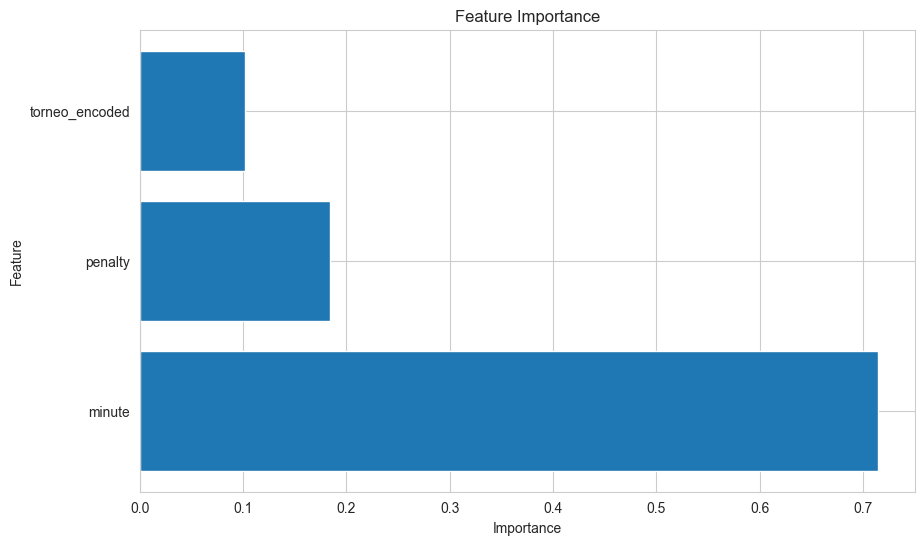

In [931]:
# Cargar el mejor modelo entrenado
mejor_modelo = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
modelo_seleccionado = mejor_modelo.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
caracteristicas = X.columns

# Obtener la importancia de características del modelo seleccionado
importancias = modelo_seleccionado.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
feature_importances = pd.DataFrame({'Feature': caracteristicas, 'Importance': importancias})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [932]:
# Calcular la frecuencia de victoria de cada equipo
frecuencia_victoria = df_encoded['ganador'].value_counts() / len(df_encoded)

# Crear un diccionario que mapee cada equipo a su frecuencia de victoria
frecuencia_dict = frecuencia_victoria.to_dict()

# Aplicar la codificación a las columnas 'team', 'equipo_local' y 'equipo_visitante'
df_encoded['team_encoded'] = df_encoded['team'].map(frecuencia_dict)
mean_encoded = df_encoded['team_encoded'].mean()
df_encoded['team_encoded'] = df_encoded['team_encoded'].fillna(mean_encoded)
df_encoded['equipo_local_encoded'] = df_encoded['equipo_local'].map(frecuencia_dict)
df_encoded['equipo_visitante_encoded'] = df_encoded['equipo_visitante'].map(frecuencia_dict)

In [933]:
null_count = df_encoded['team'].isnull().sum()
print(f"Número de valores nulos en 'team': {null_count}")

Número de valores nulos en 'team': 0


In [935]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['torneo_encoded', 'minute', 'penalty', 'team_encoded']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.015421   
1      DecisionTree     0.025323   
2      RandomForest     0.066509   
3               KNN     0.103430   
4     NeuralNetwork     0.045375   
5  GradientBoosting     0.183298   
6           XGBoost     0.208269   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 8, 'n_estimators': 300}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  
5        {'learning_rate': 0.1, 'n_estimators': 200}  
6        {'learning_rate': 0.1, 'n_estimators': 200}  

El mejor modelo es: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature

['mejor_modelo.joblib']

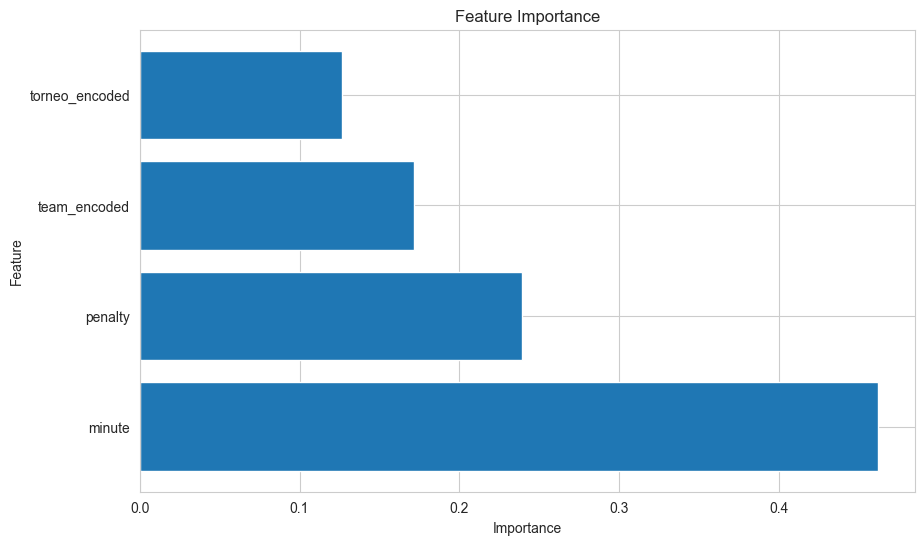

In [936]:
# Cargar el mejor modelo entrenado
mejor_modelo = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
modelo_seleccionado = mejor_modelo.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
caracteristicas = X.columns

# Obtener la importancia de características del modelo seleccionado
importancias = modelo_seleccionado.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
feature_importances = pd.DataFrame({'Feature': caracteristicas, 'Importance': importancias})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [937]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['torneo_encoded', 'minute', 'penalty', 'team_encoded']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.015421   
1      DecisionTree     0.025323   
2      RandomForest     0.067860   
3               KNN     0.103430   
4     NeuralNetwork     0.042976   
5  GradientBoosting     0.181933   
6           XGBoost     0.208269   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 8, 'n_estimators': 100}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
5        {'learning_rate': 0.1, 'n_estimators': 200}  
6        {'learning_rate': 0.1, 'n_estimators': 200}  

El mejor modelo es: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature

['mejor_modelo.joblib']

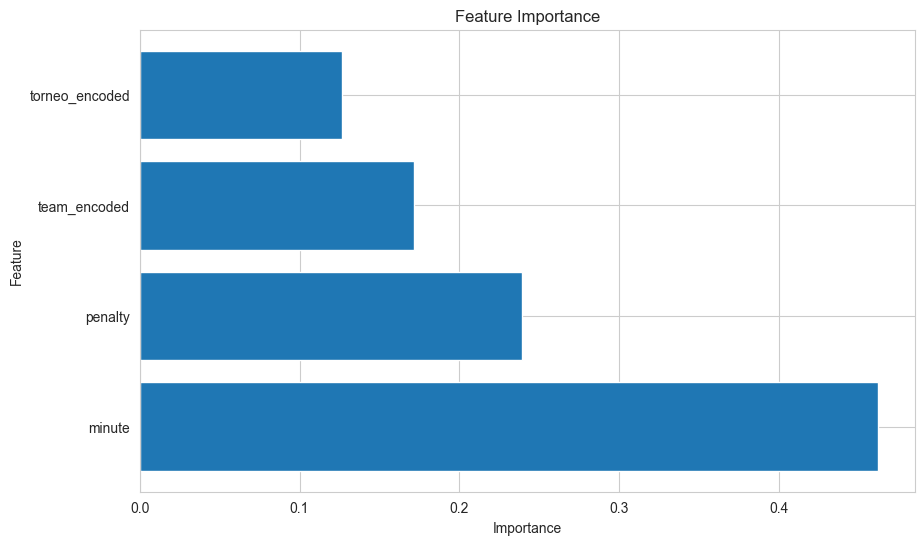

In [938]:
# Cargar el mejor modelo entrenado
mejor_modelo = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
modelo_seleccionado = mejor_modelo.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
caracteristicas = X.columns

# Obtener la importancia de características del modelo seleccionado
importancias = modelo_seleccionado.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
feature_importances = pd.DataFrame({'Feature': caracteristicas, 'Importance': importancias})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [939]:
# Agrupar el DataFrame por el partido y calcular la media de los goles anotados por equipo
df_encoded['goles_medios_team'] = df_encoded.groupby('partido')['goles_anotados'].transform('mean')

In [940]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['minute', 'penalty', 'goles_medios_team']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.385166   
1      DecisionTree     0.356342   
2      RandomForest     0.418072   
3               KNN     0.336363   
4     NeuralNetwork     0.425997   
5  GradientBoosting     0.444676   
6           XGBoost     0.384739   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 4, 'n_estimators': 300}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
5        {'learning_rate': 0.1, 'n_estimators': 100}  
6        {'learning_rate': 0.1, 'n_estimators': 100}  

El mejor modelo es: GradientBoostingRegressor() con un score de: 0.4446756092926612


['mejor_modelo.joblib']

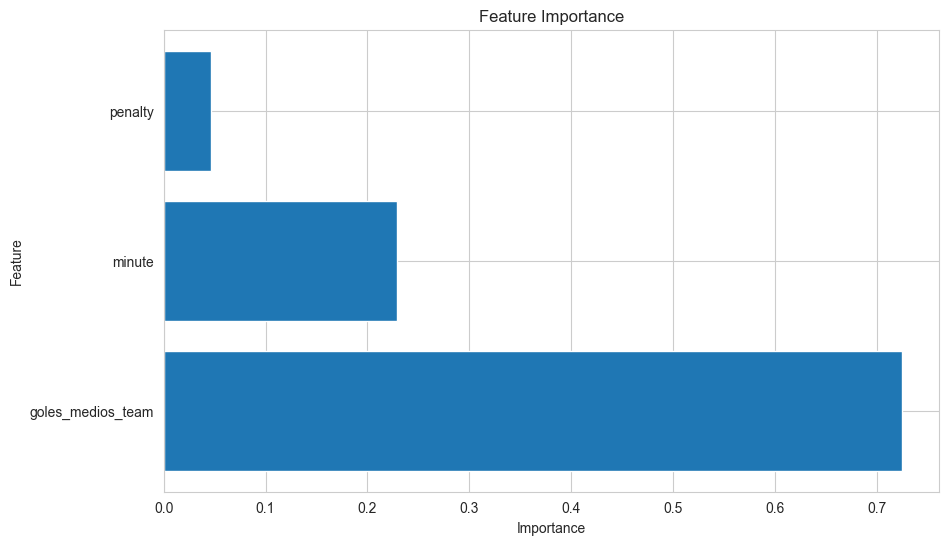

In [941]:
# Cargar el mejor modelo entrenado
mejor_modelo = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
modelo_seleccionado = mejor_modelo.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
caracteristicas = X.columns

# Obtener la importancia de características del modelo seleccionado
importancias = modelo_seleccionado.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
feature_importances = pd.DataFrame({'Feature': caracteristicas, 'Importance': importancias})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [948]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['minute', 'penalty', 'goles_medios_team']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.385166   
1      DecisionTree     0.356342   
2      RandomForest     0.418389   
3               KNN     0.336363   
4     NeuralNetwork     0.427490   
5  GradientBoosting     0.445389   
6           XGBoost     0.384739   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 4, 'n_estimators': 100}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  
5        {'learning_rate': 0.1, 'n_estimators': 100}  
6        {'learning_rate': 0.1, 'n_estimators': 100}  

El mejor modelo es: GradientBoostingRegressor() con un score de: 0.4453889745031354


['mejor_modelo.joblib']

In [949]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['minute', 'penalty', 'goles_medios_team']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos utilizando la estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train_scaled, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.385166   
1      DecisionTree     0.356342   
2      RandomForest     0.418124   
3               KNN     0.399140   
4     NeuralNetwork     0.450547   
5  GradientBoosting     0.444671   
6           XGBoost     0.385573   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 4, 'n_estimators': 100}  
3                                 {'n_neighbors': 9}  
4  {'activation': 'relu', 'alpha': 0.01, 'hidden_...  
5        {'learning_rate': 0.1, 'n_estimators': 100}  
6        {'learning_rate': 0.1, 'n_estimators': 100}  

El mejor modelo es: MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=2000) con un score de: 0.4505473539976384


['mejor_modelo.joblib']

In [943]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['torneo_encoded', 'minute', 'penalty', 'goles_medios_team', 'team_encoded']]
y = df_encoded['goles_anotados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     0.385691   
1      DecisionTree     0.355502   
2      RandomForest     0.415264   
3               KNN     0.295595   
4     NeuralNetwork     0.423781   
5  GradientBoosting     0.422493   
6           XGBoost     0.363840   

                                  Mejores Parámetros  
0                                                 {}  
1                                   {'max_depth': 4}  
2              {'max_depth': 4, 'n_estimators': 200}  
3                                 {'n_neighbors': 7}  
4  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  
5        {'learning_rate': 0.1, 'n_estimators': 100}  
6        {'learning_rate': 0.1, 'n_estimators': 100}  

El mejor modelo es: MLPRegressor(activation='tanh', max_iter=2000) con un score de: 0.42378147016420586


['mejor_modelo.joblib']

In [947]:
# Cargar el mejor modelo entrenado
mejor_modelo = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
modelo_seleccionado = mejor_modelo.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
caracteristicas = X.columns

# Obtener los coeficientes de características del modelo seleccionado
if isinstance(modelo_seleccionado, MLPRegressor):
    coeficientes = modelo_seleccionado.coefs_[0].mean(axis=1)
else:
    coeficientes = modelo_seleccionado.feature_importances_

# Crear un DataFrame para visualizar los coeficientes de características
feature_coefs = pd.DataFrame({'Feature': caracteristicas, 'Coeficient': coeficientes})

# Ordenar las características por coeficiente descendente
feature_coefs = feature_coefs.sort_values('Coeficient', ascending=False)

# Imprimir los coeficientes de características
print(feature_coefs)

             Feature  Coeficient
3  goles_medios_team    0.046078
4       team_encoded    0.017432
2            penalty    0.014013
1             minute    0.012072
0     torneo_encoded    0.004374


In [ ]:
### probabilidad victoria equipos